<center><b><span style=font-size:30px><font color='MediumBlue'><u>Deep Learning Project</u></b></center>

In [122]:
# Importing Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [123]:
# Reading CSV File

df = pd.read_csv('/content/drive/MyDrive/harshal Deep Learning/Churn_Modelling.csv')

In [124]:
# Displaying first 5 records

df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [125]:
# Size of Dataset

df.shape

(10000, 14)

In [126]:
# Deleting unwanted features permanently in dataset

df.drop(["RowNumber","CustomerId","Surname"],axis=1,inplace=True)

In [127]:
# Checking Null Values

df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

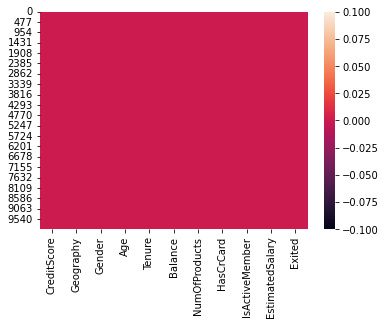

In [128]:
# Visualizing the Null value

sns.heatmap(df.isnull())
plt.show()

In [129]:
# To check the Duplicates Rows

df.duplicated().sum()

0

In [130]:
# To show the Datatypes

df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

<b><span style=font-size:20px>- <font color='LimeGreen'>Conclusion.</font></span></b>
- No Null Values found in columns.
- Found Numberical and Categorical type data in the dataset.
- We will split the dataset and use Label Encoder to convert categorical data into Numerical data as machine understands numerical language.

In [131]:
# Spliting numerical and categorical Data

df_cat = df.select_dtypes(object)
df_cat.dtypes

Geography    object
Gender       object
dtype: object

In [132]:
df_num = df.select_dtypes(['int64','float64'])
df_num.dtypes

CreditScore          int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [133]:
# Converting Categorical data into Numerical data

from sklearn.preprocessing import LabelEncoder
for col in df_cat:
  le = LabelEncoder()
  df_cat[col] = le.fit_transform(df_cat[[col]])

In [134]:
# Concatenating of df_cat and df_num

df_new = pd.concat([df_cat,df_num],axis=1)
df_new.head()

,Geography,Gender,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,0,619,42,2,0.00,1,1,1,101348.88,1
1,2,0,608,41,1,83807.86,1,0,1,112542.58,0
2,0,0,502,42,8,159660.80,3,1,0,113931.57,1
3,0,0,699,39,1,0.00,2,0,0,93826.63,0
4,2,0,850,43,2,125510.82,1,1,1,79084.10,0


In [135]:
df_new.dtypes

Geography            int64
Gender               int64
CreditScore          int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [136]:
# Selecting Input and Output
X = df_new.drop('Exited',axis=1)  # Input
Y = df_new['Exited']              # Output

In [137]:
# Using Train Test Split

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=1)

In [138]:
# Applying Standard Scaler

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [139]:
# First checking data is equally distributed or not
df_new['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

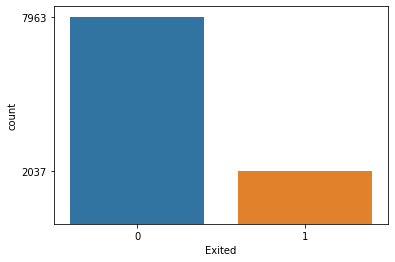

In [140]:
sns.countplot(data=df_new,x='Exited')
f = df_new['Exited'].value_counts()
plt.yticks(f)
plt.show()

<b><span style=font-size:20px>- <font color='LimeGreen'>Conclusion.</font></span></b>
- Here we can see the Data is not equaly distributed.
- So we will use Random Over Sampler to make Data Equal.

In [141]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=1)

In [142]:
# Before Applying RandomOverSampler on Training Data
Y_train.value_counts()

0    5590
1    1410
Name: Exited, dtype: int64

In [143]:
# Applied OverSampler on Training data (70%)
X_train_ros,Y_train_ros = ros.fit_resample(X_train,Y_train)

In [144]:
# Check after apply RandomOverSampler
Y_train_ros.value_counts()

0    5590
1    5590
Name: Exited, dtype: int64

In [145]:
# Before apply RandomOverSampler on testing data
Y_test.value_counts()

0    2373
1     627
Name: Exited, dtype: int64

In [146]:
# Also apply RandomOverSampler on tesing data (30%)
X_test_ros,Y_test_ros = ros.fit_resample(X_test,Y_test)

In [147]:
Y_test_ros.value_counts()

0    2373
1    2373
Name: Exited, dtype: int64

<h2><b>- <font color='orangered'>Creating Neural Network</font></b></h2>

In [148]:
import tensorflow as tf
model = tf.keras.Sequential([
        tf.keras.layers.Dense(units=10,activation='relu',input_shape=(X.shape[1],)),   # 1st Hidden Layer
        tf.keras.layers.Dense(units=10,activation='relu'),                             # 2nd Hidden Layer
        tf.keras.layers.Dense(units=1,activation='sigmoid')                            # Output Layer
])

In [149]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 10)                110       
                                                                 
 dense_22 (Dense)            (None, 10)                110       
                                                                 
 dense_23 (Dense)            (None, 1)                 11        
                                                                 
Total params: 231
Trainable params: 231
Non-trainable params: 0
_________________________________________________________________


In [150]:
# Compile the model
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [151]:
# Create Early stopping means create a call back
from tensorflow.keras.callbacks import EarlyStopping
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [152]:
# Train the Model
trained_model = model.fit(X_train_ros,Y_train_ros,batch_size=20,epochs=3500,
                          validation_data=(X_test_ros,Y_test_ros),callbacks=callback)

Epoch 1/3500
559/559 [==============================] - 2s 3ms/step - loss: 0.6166 - accuracy: 0.6625 - val_loss: 0.5785 - val_accuracy: 0.6915
Epoch 2/3500
559/559 [==============================] - 1s 2ms/step - loss: 0.5618 - accuracy: 0.7123 - val_loss: 0.5468 - val_accuracy: 0.7139
Epoch 3/3500
559/559 [==============================] - 2s 4ms/step - loss: 0.5285 - accuracy: 0.7384 - val_loss: 0.5192 - val_accuracy: 0.7408
Epoch 4/3500
559/559 [==============================] - 3s 5ms/step - loss: 0.5031 - accuracy: 0.7541 - val_loss: 0.4993 - val_accuracy: 0.7474
Epoch 5/3500
559/559 [==============================] - 2s 4ms/step - loss: 0.4869 - accuracy: 0.7642 - val_loss: 0.4879 - val_accuracy: 0.7537
Epoch 6/3500
559/559 [==============================] - 2s 4ms/step - loss: 0.4792 - accuracy: 0.7663 - val_loss: 0.4805 - val_accuracy: 0.7613
Epoch 7/3500
559/559 [==============================] - 2s 4ms/step - loss: 0.4733 - accuracy: 0.7724 - val_loss: 0.4770 - val_accuracy:

In [153]:
print("Training Loss and Training Accuracy:",model.evaluate(X_train_ros,Y_train_ros))
print("Testing Loss and Testing Accuracy:",model.evaluate(X_train_ros,Y_train_ros))

350/350 [==============================] - 0s 1ms/step - loss: 0.4373 - accuracy: 0.7889
Training Loss and Training Accuracy: [0.43734443187713623, 0.7889087796211243]
350/350 [==============================] - 0s 1ms/step - loss: 0.4373 - accuracy: 0.7889
Testing Loss and Testing Accuracy: [0.43734443187713623, 0.7889087796211243]


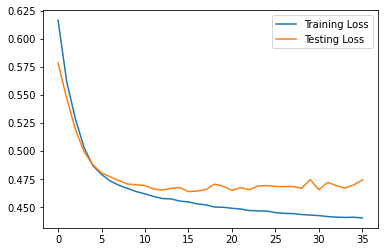

In [154]:
# Visualisation Training and Testing Loss
plt.plot(trained_model.history['loss'],label='Training Loss')
plt.plot(trained_model.history['val_loss'],label='Testing Loss')
plt.legend()
plt.show()

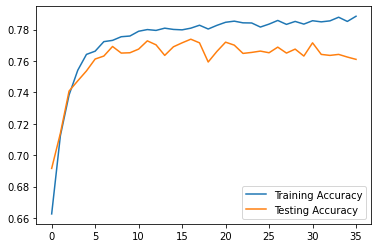

In [155]:
# Visualise
plt.plot(trained_model.history['accuracy'],label='Training Accuracy')
plt.plot(trained_model.history['val_accuracy'],label='Testing Accuracy')
plt.legend()
plt.show()

<b><span style=font-size:20px>- <font color='LimeGreen'>Conclusion.</font></span></b>
- Here we can see their is gap between Accuracy and loss, Which shows the model is Overfit

In [156]:
# Test the model with 30% data
Y_pred = model.predict(X_test_ros).round(2)
Y_pred

array([[0.16],
       [0.35],
       [0.21],
       ...,
       [0.21],
       [0.54],
       [0.54]], dtype=float32)

In [157]:
Y_pred = np.where(Y_pred>=0.5,1,0)
Y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [1]])

In [158]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_test_ros,Y_pred))
print(confusion_matrix(Y_test_ros,Y_pred))

              precision    recall  f1-score   support

           0       0.74      0.80      0.77      2373
           1       0.78      0.72      0.75      2373

    accuracy                           0.76      4746
   macro avg       0.76      0.76      0.76      4746
weighted avg       0.76      0.76      0.76      4746

[[1892  481]
 [ 658 1715]]


In [159]:
X.shape

(10000, 10)

<b><span style=font-size:20px>- <font color='LimeGreen'>Conclusion.</font></span></b>
- To reduce overfitting we will use Regularization: Ridge means L2.

In [160]:
# Create a Neural Network

from keras import regularizers
from keras.layers import Dropout
model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(units=10,activation='relu',input_shape=(X.shape[1],),kernel_regularizer=regularizers.l2(0.01)),  # 1st Hidden Layer
        tf.keras.layers.Dense(units=10,activation='relu',kernel_regularizer=regularizers.l2(0.01)),                            # 2nd Hidden Layer
        tf.keras.layers.Dense(units=1,activation='sigmoid',kernel_regularizer=regularizers.l2(0.01))                           # Output Layer 
])

In [161]:
# Compile the model

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [162]:
# Train the Model

trained_model= model.fit(X_train_ros,Y_train_ros,batch_size=32,epochs=3500,
                          validation_data=(X_test_ros,Y_test_ros),callbacks=callback)

Epoch 1/3500
350/350 [==============================] - 2s 3ms/step - loss: 0.7822 - accuracy: 0.6542 - val_loss: 0.7012 - val_accuracy: 0.6854
Epoch 2/3500
350/350 [==============================] - 1s 3ms/step - loss: 0.6584 - accuracy: 0.7159 - val_loss: 0.6303 - val_accuracy: 0.7196
Epoch 3/3500
350/350 [==============================] - 1s 2ms/step - loss: 0.6119 - accuracy: 0.7370 - val_loss: 0.6003 - val_accuracy: 0.7423
Epoch 4/3500
350/350 [==============================] - 1s 2ms/step - loss: 0.5892 - accuracy: 0.7481 - val_loss: 0.5874 - val_accuracy: 0.7446
Epoch 5/3500
350/350 [==============================] - 1s 2ms/step - loss: 0.5806 - accuracy: 0.7504 - val_loss: 0.5798 - val_accuracy: 0.7501
Epoch 6/3500
350/350 [==============================] - 1s 2ms/step - loss: 0.5772 - accuracy: 0.7514 - val_loss: 0.5778 - val_accuracy: 0.7446
Epoch 7/3500
350/350 [==============================] - 1s 2ms/step - loss: 0.5754 - accuracy: 0.7526 - val_loss: 0.5751 - val_accuracy:

In [163]:
print("Training Loss and Training Accuracy:",model.evaluate(X_train_ros,Y_train_ros))
print("Testing Loss and Testing Accuracy:",model.evaluate(X_train_ros,Y_train_ros))

350/350 [==============================] - 0s 1ms/step - loss: 0.5691 - accuracy: 0.7534
Training Loss and Training Accuracy: [0.5691092014312744, 0.7533989548683167]
350/350 [==============================] - 0s 1ms/step - loss: 0.5691 - accuracy: 0.7534
Testing Loss and Testing Accuracy: [0.5691092014312744, 0.7533989548683167]


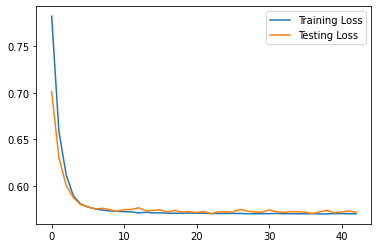

In [164]:
# Visualisation Training and Testing Loss

plt.plot(trained_model.history['loss'],label='Training Loss')
plt.plot(trained_model.history['val_loss'],label='Testing Loss')
plt.legend()
plt.show()

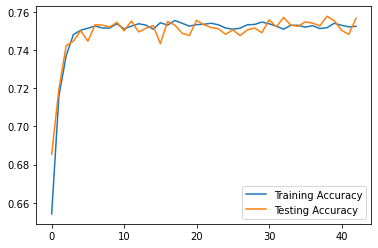

In [165]:
# Visualisation Training and Testing Accuracy

plt.plot(trained_model.history['accuracy'],label='Training Accuracy')
plt.plot(trained_model.history['val_accuracy'],label='Testing Accuracy')
plt.legend()
plt.show()

In [166]:
# Test the model with 30% data

Y_pred = model.predict(X_test_ros).round(2)
Y_pred

array([[0.21],
       [0.4 ],
       [0.19],
       ...,
       [0.63],
       [0.39],
       [0.39]], dtype=float32)

In [167]:
Y_pred = np.where(Y_pred>=0.5,1,0)
Y_pred

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]])

In [168]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_test_ros,Y_pred))
print(confusion_matrix(Y_test_ros,Y_pred))

              precision    recall  f1-score   support

           0       0.74      0.78      0.76      2373
           1       0.77      0.72      0.75      2373

    accuracy                           0.75      4746
   macro avg       0.75      0.75      0.75      4746
weighted avg       0.75      0.75      0.75      4746

[[1860  513]
 [ 657 1716]]


<b><span style=font-size:20px>- <font color='LimeGreen'>Conclusion.</font></span></b>
- After using Regularization we got good results, but we will still try to get more accuracy.
- So now we will increase the unit of neurons and use Dropout which will help to handle big neurons.

In [178]:
# Create a Neural Network

from keras import regularizers
from keras.layers import Dropout
model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(units=1000,activation='relu',input_shape=(X.shape[1],),kernel_regularizer=regularizers.l2(0.01)),Dropout(0.5),  # 1st Hidden Layer
        tf.keras.layers.Dense(units=1000,activation='relu',kernel_regularizer=regularizers.l2(0.01)),Dropout(0.5),                            # 2nd Hidden Layer
        tf.keras.layers.Dense(units=1,activation='sigmoid',kernel_regularizer=regularizers.l2(0.01))                                          # Output Layer 
])

In [179]:
# Compile the model

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [180]:
# Train the Model

trained_model= model.fit(X_train_ros,Y_train_ros,batch_size=32,epochs=3500,
                          validation_data=(X_test_ros,Y_test_ros),callbacks=callback)

Epoch 1/3500
350/350 [==============================] - 7s 17ms/step - loss: 1.2418 - accuracy: 0.7200 - val_loss: 0.6402 - val_accuracy: 0.7259
Epoch 2/3500
350/350 [==============================] - 6s 16ms/step - loss: 0.6193 - accuracy: 0.7411 - val_loss: 0.6098 - val_accuracy: 0.7370
Epoch 3/3500
350/350 [==============================] - 6s 17ms/step - loss: 0.6103 - accuracy: 0.7440 - val_loss: 0.6156 - val_accuracy: 0.7265
Epoch 4/3500
350/350 [==============================] - 6s 16ms/step - loss: 0.6080 - accuracy: 0.7436 - val_loss: 0.6055 - val_accuracy: 0.7330
Epoch 5/3500
350/350 [==============================] - 6s 16ms/step - loss: 0.6051 - accuracy: 0.7436 - val_loss: 0.5986 - val_accuracy: 0.7476
Epoch 6/3500
350/350 [==============================] - 6s 17ms/step - loss: 0.6055 - accuracy: 0.7409 - val_loss: 0.5976 - val_accuracy: 0.7571
Epoch 7/3500
350/350 [==============================] - 6s 16ms/step - loss: 0.6045 - accuracy: 0.7428 - val_loss: 0.5948 - val_ac

In [181]:
print("Training Loss and Training Accuracy:",model.evaluate(X_train_ros,Y_train_ros))
print("Testing Loss and Testing Accuracy:",model.evaluate(X_train_ros,Y_train_ros))

350/350 [==============================] - 1s 4ms/step - loss: 0.5821 - accuracy: 0.7520
Training Loss and Training Accuracy: [0.5820778012275696, 0.7519677877426147]
350/350 [==============================] - 2s 4ms/step - loss: 0.5821 - accuracy: 0.7520
Testing Loss and Testing Accuracy: [0.5820778012275696, 0.7519677877426147]


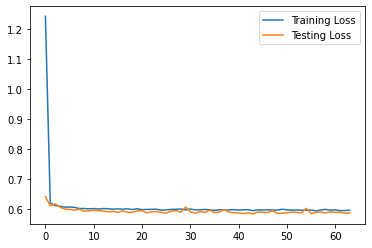

In [182]:
# Visualisation Training and Testing Loss

plt.plot(trained_model.history['loss'],label='Training Loss')
plt.plot(trained_model.history['val_loss'],label='Testing Loss')
plt.legend()
plt.show()

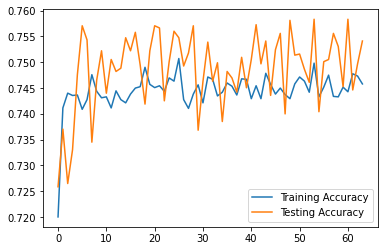

In [183]:
# Visualisation Training and Testing Accuracy

plt.plot(trained_model.history['accuracy'],label='Training Accuracy')
plt.plot(trained_model.history['val_accuracy'],label='Testing Accuracy')
plt.legend()
plt.show()

In [184]:
# Test the model with 30% data

Y_pred = model.predict(X_test_ros).round(2)
Y_pred

array([[0.25],
       [0.48],
       [0.25],
       ...,
       [0.58],
       [0.41],
       [0.45]], dtype=float32)

In [185]:
Y_pred = np.where(Y_pred>=0.5,1,0)
Y_pred

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]])

In [186]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_test_ros,Y_pred))
print(confusion_matrix(Y_test_ros,Y_pred))

              precision    recall  f1-score   support

           0       0.76      0.75      0.75      2373
           1       0.75      0.76      0.76      2373

    accuracy                           0.75      4746
   macro avg       0.75      0.75      0.75      4746
weighted avg       0.75      0.75      0.75      4746

[[1772  601]
 [ 566 1807]]


<b><span style=font-size:20px>- <font color='LimeGreen'>Conclusion.</font></span></b>
- After applying Dropout we got better percentage as what we had applied using Regularization.